In [1]:
# import my dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import csv

### Comparing Total Number of Suicides Against A Country's Happiness Rank

Our initial test is to see if there is a relationship between a country's happiness rank and the total number of suicides they had in the year 2015.

In [2]:
# store file path to a variable, then create a DataFrame from that variable

file = 'merged_data_2.csv'
df = pd.read_csv(file)

The correlation between a country's happiness rank and their total suicide number is: -0.15


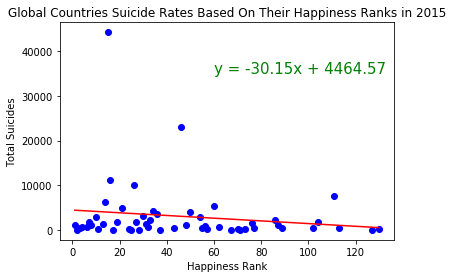

In [3]:
# Create Scatter Plot to Look at Relationship Between A Country's Happiness Rank, and their Total
# Number of Suicides in the Year 2015

xval = df['happiness rank']
yval = df['Total Number of Suicides']

# Determine Correlation

correlation = st.pearsonr(xval,yval)

# Add Line of Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xval, yval)
regress_values = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot

fig1 = plt.scatter(xval,yval,color='blue')
plt.plot(xval,regress_values,"r-")
plt.annotate(line_eq,(60,35000),fontsize=15,color="green")
plt.title('Global Countries Suicide Rates Based On Their Happiness Ranks in 2015')
plt.xlabel('Happiness Rank')
plt.ylabel('Total Suicides')

# Print Out the Correlation Between the Relationship

print(f"The correlation between a country's happiness rank and their total suicide number is: {round(correlation[0],2)}")
plt.savefig("Chart_Images/global_totalSui_per_Happiness_CHG", bbox_inches="tight")
plt.show(fig1)

In [4]:
plt.close()

### Comparing Happiness Rank Against Number of Suicides Per 100k Population

Next, we decided to compare a country's happiness rank against their total number of suicides per 100k population. This data point gives us a better idea of the suicide rate as it relates to the total population of a country.

The correlation between a country's happiness rank and their number of suicides per 100k population is: 0.0


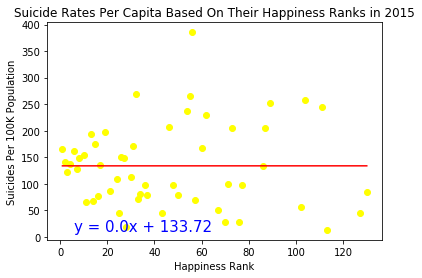

In [5]:
# Create Scatter Plot to Look at Relationship Between A Country's Happiness Rank, and the Number
# of Suicides They Had Per 100K Population in the Year 2015


x_values = df['happiness rank']
y_values = df['Number of Suicides per 100K Population']

# Determine Correlation

correlation2 = st.pearsonr(x_values,y_values)

# Add the linear regression equation to the data to determine if there is a trend

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot

fig2 = plt.scatter(x_values,y_values,color='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title('Suicide Rates Per Capita Based On Their Happiness Ranks in 2015')
plt.xlabel('Happiness Rank')
plt.ylabel('Suicides Per 100K Population')

# Print Out the Correlation Between the Relationship

print(f"The correlation between a country's happiness rank and their number of suicides per 100k population is: {round(correlation2[0],2)}")
plt.savefig("Chart_Images/global_perCapSui_per_Happiness_CHG", bbox_inches="tight")
plt.show(fig2)

In [6]:
plt.close()

### We Did Not Find A High Level Trend - Time to Dig Deeper

Since we did not find any meaningful relationship between happiness rank and suicide, I am going to look into some other facets of the happiness score to see if there are any relationships there

The correlation between a country's trust in government and their number of suicides per 100k population is: -0.16


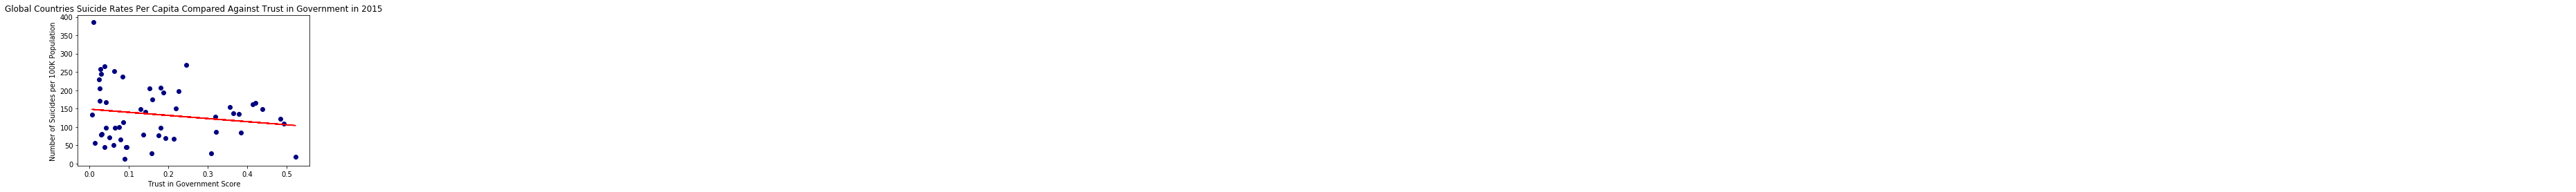

In [7]:
# Taking a look at Suicides Per 100k Pop and Trust

hap = df['Number of Suicides per 100K Population']
trust = df['Trust (Government Corruption)']

# Determine Correlation

correlation_trust = st.pearsonr(trust,hap)

# Add the linear regression equation to the data to determine if there is a trend

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(trust, hap)
regress_values = trust * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot

fig3 = plt.scatter(trust,hap,color='navy')
plt.plot(trust,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.title('Global Countries Suicide Rates Per Capita Compared Against Trust in Government in 2015')
plt.xlabel('Trust in Government Score')
plt.ylabel('Number of Suicides per 100K Population')

# Print Out the Correlation Between the Relationship

print(f"The correlation between a country's trust in government and their number of suicides per 100k population is: {round(correlation_trust[0],2)}")
plt.savefig("Chart_Images/TrustvsSuiperCap_CHG", bbox_inches="tight")
plt.show(fig3)

In [8]:
plt.close()

The correlation between a country's feeling of freedom and their number of suicides per 100k population is: -0.06


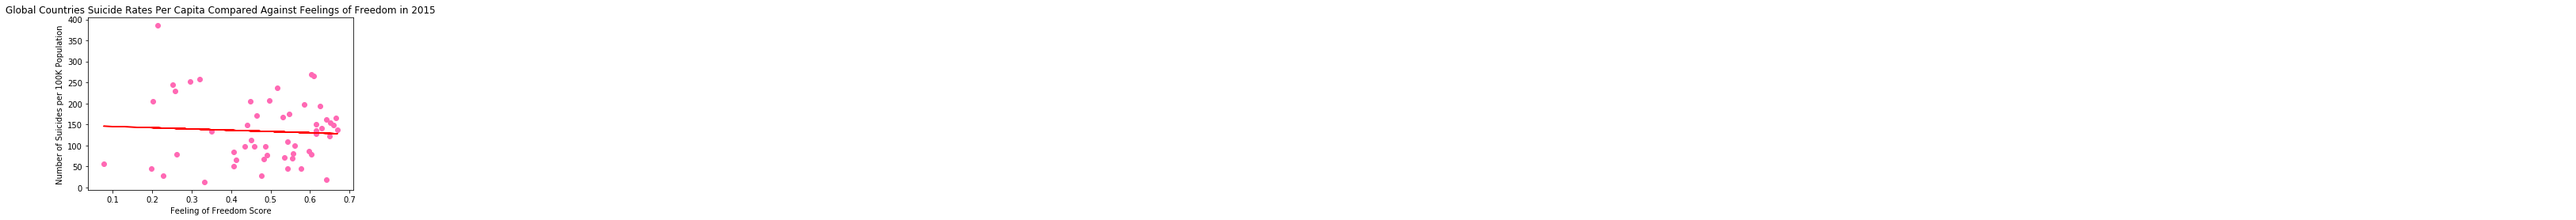

In [9]:
# Taking a look at Suicides Per 100k Pop and Freedom

free = df['Number of Suicides per 100K Population']
sui = df['Freedom']

# Determine Correlation

correlation_trust = st.pearsonr(sui,free)

# Add the linear regression equation to the data to determine if there is a trend

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sui,free)
regress_values = sui * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot

fig4 = plt.scatter(sui,free,color='hotpink')
plt.plot(sui,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.title('Global Countries Suicide Rates Per Capita Compared Against Feelings of Freedom in 2015')
plt.xlabel('Feeling of Freedom Score')
plt.ylabel('Number of Suicides per 100K Population')

# Print Out the Correlation Between the Relationship

print(f"The correlation between a country's feeling of freedom and their number of suicides per 100k population is: {round(correlation_trust[0],2)}")
plt.savefig("Chart_Images/FreedomvsSuiperCap_CHG", bbox_inches="tight")
plt.show(fig4)

In [10]:
plt.close()

### Comparing All Happiness Factors Against Number of Suicides per 100k Population

After looking at Trust and Freedom without being able to draw many conclusions. We decided to look at the correlations between each individual happiness factor against the number of suicides per 100k population. If we graph the correlation for each factor, we may see that there is a clear front-runner in suicide number estimation.

In [11]:
# creating a new dataframe with Region and Country as the index

df2 = df.set_index(['region','country'])

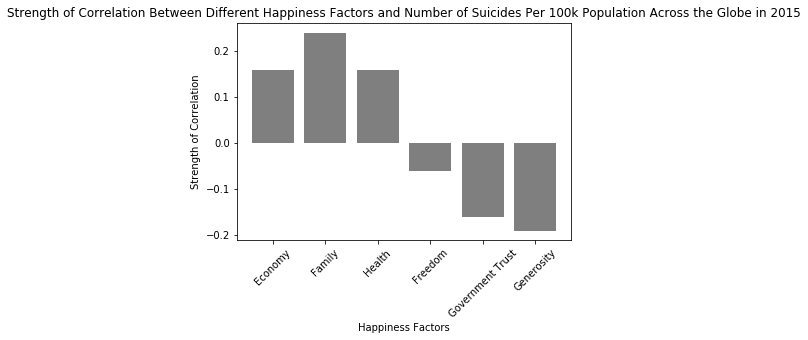

In [12]:
# calculate correlation between happiness variables and suicides per 100k people

# set up variables

suicide = df2['Number of Suicides per 100K Population']
economy = df2['economy (GDP per Capita)']
family = df2['Family']
health = df2['Health (Life Expectancy)']
free = df2['Freedom']
trust = df2['Trust (Government Corruption)']
generous = df2['Generosity']

# run calculations

correlation_economy = round(st.pearsonr(suicide,economy)[0],2)
correlation_family = round(st.pearsonr(suicide,family)[0],2)
correlation_health = round(st.pearsonr(suicide,health)[0],2)
correlation_free = round(st.pearsonr(suicide,free)[0],2)
correlation_trust = round(st.pearsonr(suicide,trust)[0],2)
correlation_generous = round(st.pearsonr(suicide,generous)[0],2)

# create a bar graph to demonstrate which has the strong relationship

correlationsList = [correlation_economy,correlation_family,correlation_health,correlation_free,
                   correlation_trust,correlation_generous]

factors = ['Economy','Family','Health','Freedom','Government Trust','Generosity']

fig5 = plt.bar(factors,correlationsList, color='black',alpha=0.5,align='center')
plt.xticks(factors,rotation='45')
plt.tight_layout
plt.title('Strength of Correlation Between Different Happiness Factors and Number of Suicides Per 100k Population Across the Globe in 2015')
plt.xlabel('Happiness Factors')
plt.ylabel('Strength of Correlation')

plt.savefig("Chart_Images/Correlation_HappinessFactors_SuicidesPerCap_CHG", bbox_inches="tight")
plt.show(fig5)

In [13]:
plt.close()

### Calculating P-Values For Each Happiness Factors Against Suicides Per 100k Population

When looking at the Correlation chart, we can see two things very clearly. First, there are two front-runners on either end of the spectrum. The strongest positive correlation being 'Family', and the strongest negative correlation being 'Generosity'. Second, although they are the front-runners - they have fairly weak correlations with neither factor going above 0.30.

This lead us to look into the P-Values for each of these factors to determine if any of them had a significant relationship with the number of suicides per 100k population.

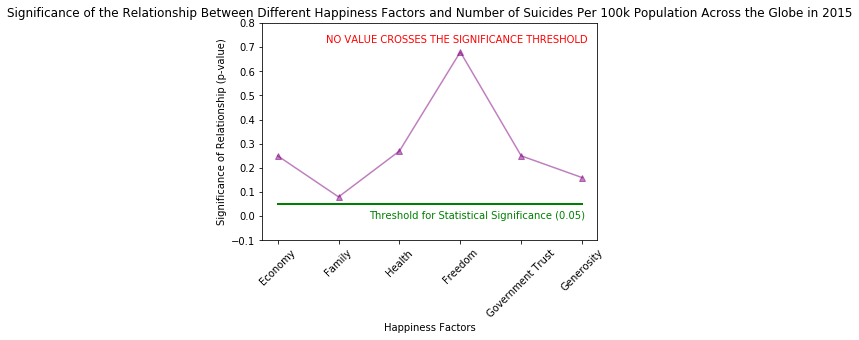

In [14]:
# calculate p-values for happiness factors against suicides per 100k population

p_economy = round(st.pearsonr(suicide,economy)[1],2)
p_family = round(st.pearsonr(suicide,family)[1],2)
p_health = round(st.pearsonr(suicide,health)[1],2)
p_free = round(st.pearsonr(suicide,free)[1],2)
p_trust = round(st.pearsonr(suicide,trust)[1],2)
p_generous = round(st.pearsonr(suicide,generous)[1],2)

# create a bar graph to demonstrate which has the strong relationship

correlationsList2 = [p_economy,p_family,p_health,p_free,
                   p_trust,p_generous]

factors2 = ['Economy','Family','Health','Freedom','Government Trust','Generosity']

fig6 = plt.plot(factors2,correlationsList2, color='purple',alpha=0.5,marker='^')
plt.plot([0,5],[0.05,0.05],color='green', linestyle='-', linewidth=2)
plt.annotate('Threshold for Statistical Significance (0.05)',xy=(1.5,-0.01),color='green')
plt.annotate('NO VALUE CROSSES THE SIGNIFICANCE THRESHOLD',xy=(0.8,0.72),color='red')
plt.xticks(factors2,rotation='45')
plt.ylim(-0.1,0.8)
plt.title('Significance of the Relationship Between Different Happiness Factors and Number of Suicides Per 100k Population Across the Globe in 2015')
plt.xlabel('Happiness Factors')
plt.ylabel('Significance of Relationship (p-value)')

plt.savefig("Chart_Images/PValues_HappinessFactors_SuicidesPerCap_CHG", bbox_inches="tight")
plt.show(fig6)

In [15]:
plt.close()

### Conclusion

After looking at the p-values for each of the individual happiness factors, it is clear that none of them have a significant relationship with the number of suicides per 100k population. Meaning, these happiness factors do not significantly influence the number of suicides a country has per 100k population.